In [363]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
!pip install xgboost




import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression



In [364]:
DF= pd.read_csv('downloads/kc_house_data.csv')


In [365]:
DF


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900",3,1,1180,5650,1,NaN,0,...,7,1180,0.0,1955,0,98178,48,-122,1340,5650
1,6414100192,12/9/2014,"538,000",3,2,2570,7242,2,0,0,...,7,2170,400.0,1951,"1,991",98125,48,-122,1690,7639
2,5631500400,2/25/2015,"180,000",2,1,770,10000,1,0,0,...,6,770,0.0,1933,NaN,98028,48,-122,2720,8062
3,2487200875,12/9/2014,"604,000",4,3,1960,5000,1,0,0,...,7,1050,910.0,1965,0,98136,48,-122,1360,5000
4,1954400510,2/18/2015,"510,000",3,2,1680,8080,1,0,0,...,8,1680,0.0,1987,0,98074,48,-122,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,"360,000",3,2,1530,1131,3,0,0,...,8,1530,0.0,2009,0,98103,48,-122,1530,1509
21593,6600060120,2/23/2015,"400,000",4,2,2310,5813,2,0,0,...,8,2310,0.0,2014,0,98146,48,-122,1830,7200
21594,1523300141,6/23/2014,"402,101",2,1,1020,1350,2,0,0,...,7,1020,0.0,2009,0,98144,48,-122,1020,2007
21595,291310100,1/16/2015,"400,000",3,2,1600,2388,2,NaN,0,...,8,1600,0.0,2004,0,98027,48,-122,1410,1287


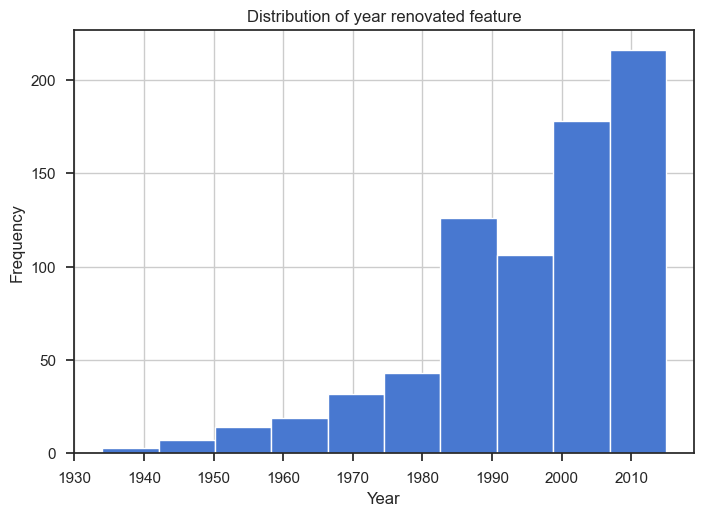

In [366]:
# Visualise yr_renovated post 1900 (to not show all the 0 values)
DF[DF['yr_renovated'] > 1900]['yr_renovated'].hist()
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title("Distribution of year renovated feature")
plt.show()

In [367]:
  DF.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,597","21,597","21,597","21,597","21,597","21,597","21,597","19,221","21,534","21,597","21,597","21,597","21,597","17,755","21,597","21,597","21,597","21,597","21,597"
mean,"4,580,474,288","540,297",3,2,"2,080","15,099",1,0,0,3,8,"1,789","1,971",84,"98,078",48,-122,"1,987","12,758"
std,"2,876,735,716","367,368",1,1,918,"41,413",1,0,1,1,1,828,29,400,54,0,0,685,"27,274"
min,"1,000,102","78,000",1,0,370,520,1,0,0,1,3,370,"1,900",0,"98,001",47,-123,399,651
25%,"2,123,049,175","322,000",3,2,"1,430","5,040",1,0,0,3,7,"1,190","1,951",0,"98,033",47,-122,"1,490","5,100"
50%,"3,904,930,410","450,000",3,2,"1,910","7,618",2,0,0,3,7,"1,560","1,975",0,"98,065",48,-122,"1,840","7,620"
75%,"7,308,900,490","645,000",4,2,"2,550","10,685",2,0,0,4,8,"2,210","1,997",0,"98,118",48,-122,"2,360","10,083"
max,"9,900,000,190","7,700,000",33,8,"13,540","1,651,359",4,1,4,5,13,"9,410","2,015","2,015","98,199",48,-121,"6,210","871,200"


In [368]:
DF.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [369]:
del DF['long']

In [370]:
#view first five records
DF.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900",3,1,1180,5650,1,NaN,0,3,7,1180,0.0,1955,0,98178,48,1340,5650
1,6414100192,12/9/2014,"538,000",3,2,2570,7242,2,0,0,3,7,2170,400.0,1951,"1,991",98125,48,1690,7639
2,5631500400,2/25/2015,"180,000",2,1,770,10000,1,0,0,3,6,770,0.0,1933,NaN,98028,48,2720,8062
3,2487200875,12/9/2014,"604,000",4,3,1960,5000,1,0,0,5,7,1050,910.0,1965,0,98136,48,1360,5000
4,1954400510,2/18/2015,"510,000",3,2,1680,8080,1,0,0,3,8,1680,0.0,1987,0,98074,48,1800,7503


In [371]:
#view first 5 records
DF.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900",3,1,1180,5650,1,NaN,0,3,7,1180,0.0,1955,0,98178,48,1340,5650
1,6414100192,12/9/2014,"538,000",3,2,2570,7242,2,0,0,3,7,2170,400.0,1951,"1,991",98125,48,1690,7639
2,5631500400,2/25/2015,"180,000",2,1,770,10000,1,0,0,3,6,770,0.0,1933,NaN,98028,48,2720,8062
3,2487200875,12/9/2014,"604,000",4,3,1960,5000,1,0,0,5,7,1050,910.0,1965,0,98136,48,1360,5000
4,1954400510,2/18/2015,"510,000",3,2,1680,8080,1,0,0,3,8,1680,0.0,1987,0,98074,48,1800,7503


In [372]:
#finding value counts of no of bedrooms 
DF.bedrooms.value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [373]:
#removing outlier with '33' bedrooms
DF=DF[DF['bedrooms']!=33]

In [374]:
#check if the outlier is removed
DF.bedrooms.value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [375]:
#conevrting data column into float type
pd.options.display.float_format = '{:,.0f}'.format
DF

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900",3,1,1180,5650,1,NaN,0,3,7,1180,0.0,1955,0,98178,48,1340,5650
1,6414100192,12/9/2014,"538,000",3,2,2570,7242,2,0,0,3,7,2170,400.0,1951,"1,991",98125,48,1690,7639
2,5631500400,2/25/2015,"180,000",2,1,770,10000,1,0,0,3,6,770,0.0,1933,NaN,98028,48,2720,8062
3,2487200875,12/9/2014,"604,000",4,3,1960,5000,1,0,0,5,7,1050,910.0,1965,0,98136,48,1360,5000
4,1954400510,2/18/2015,"510,000",3,2,1680,8080,1,0,0,3,8,1680,0.0,1987,0,98074,48,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,"360,000",3,2,1530,1131,3,0,0,3,8,1530,0.0,2009,0,98103,48,1530,1509
21593,6600060120,2/23/2015,"400,000",4,2,2310,5813,2,0,0,3,8,2310,0.0,2014,0,98146,48,1830,7200
21594,1523300141,6/23/2014,"402,101",2,1,1020,1350,2,0,0,3,7,1020,0.0,2009,0,98144,48,1020,2007
21595,291310100,1/16/2015,"400,000",3,2,1600,2388,2,NaN,0,3,8,1600,0.0,2004,0,98027,48,1410,1287


In [376]:
#formatting the unncessary values in data column
DF['date']=[x[:8] for x in DF['date']]
DF

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,7129300520,10/13/20,"221,900",3,1,1180,5650,1,NaN,0,3,7,1180,0.0,1955,0,98178,48,1340,5650
1,6414100192,12/9/201,"538,000",3,2,2570,7242,2,0,0,3,7,2170,400.0,1951,"1,991",98125,48,1690,7639
2,5631500400,2/25/201,"180,000",2,1,770,10000,1,0,0,3,6,770,0.0,1933,NaN,98028,48,2720,8062
3,2487200875,12/9/201,"604,000",4,3,1960,5000,1,0,0,5,7,1050,910.0,1965,0,98136,48,1360,5000
4,1954400510,2/18/201,"510,000",3,2,1680,8080,1,0,0,3,8,1680,0.0,1987,0,98074,48,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/201,"360,000",3,2,1530,1131,3,0,0,3,8,1530,0.0,2009,0,98103,48,1530,1509
21593,6600060120,2/23/201,"400,000",4,2,2310,5813,2,0,0,3,8,2310,0.0,2014,0,98146,48,1830,7200
21594,1523300141,6/23/201,"402,101",2,1,1020,1350,2,0,0,3,7,1020,0.0,2009,0,98144,48,1020,2007
21595,291310100,1/16/201,"400,000",3,2,1600,2388,2,NaN,0,3,8,1600,0.0,2004,0,98027,48,1410,1287


In [377]:
#changing date column into date type using pandas
DF['date'] = pd.to_datetime(DF['date'], errors='coerce')
DF

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,7129300520,2020-10-13,"221,900",3,1,1180,5650,1,NaN,0,3,7,1180,0.0,1955,0,98178,48,1340,5650
1,6414100192,NaT,"538,000",3,2,2570,7242,2,0,0,3,7,2170,400.0,1951,"1,991",98125,48,1690,7639
2,5631500400,NaT,"180,000",2,1,770,10000,1,0,0,3,6,770,0.0,1933,NaN,98028,48,2720,8062
3,2487200875,NaT,"604,000",4,3,1960,5000,1,0,0,5,7,1050,910.0,1965,0,98136,48,1360,5000
4,1954400510,NaT,"510,000",3,2,1680,8080,1,0,0,3,8,1680,0.0,1987,0,98074,48,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,NaT,"360,000",3,2,1530,1131,3,0,0,3,8,1530,0.0,2009,0,98103,48,1530,1509
21593,6600060120,NaT,"400,000",4,2,2310,5813,2,0,0,3,8,2310,0.0,2014,0,98146,48,1830,7200
21594,1523300141,NaT,"402,101",2,1,1020,1350,2,0,0,3,7,1020,0.0,2009,0,98144,48,1020,2007
21595,291310100,NaT,"400,000",3,2,1600,2388,2,NaN,0,3,8,1600,0.0,2004,0,98027,48,1410,1287


In [378]:
DF = DF.drop("date", axis='columns')

In [379]:
DF

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,7129300520,"221,900",3,1,1180,5650,1,NaN,0,3,7,1180,0.0,1955,0,98178,48,1340,5650
1,6414100192,"538,000",3,2,2570,7242,2,0,0,3,7,2170,400.0,1951,"1,991",98125,48,1690,7639
2,5631500400,"180,000",2,1,770,10000,1,0,0,3,6,770,0.0,1933,NaN,98028,48,2720,8062
3,2487200875,"604,000",4,3,1960,5000,1,0,0,5,7,1050,910.0,1965,0,98136,48,1360,5000
4,1954400510,"510,000",3,2,1680,8080,1,0,0,3,8,1680,0.0,1987,0,98074,48,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,"360,000",3,2,1530,1131,3,0,0,3,8,1530,0.0,2009,0,98103,48,1530,1509
21593,6600060120,"400,000",4,2,2310,5813,2,0,0,3,8,2310,0.0,2014,0,98146,48,1830,7200
21594,1523300141,"402,101",2,1,1020,1350,2,0,0,3,7,1020,0.0,2009,0,98144,48,1020,2007
21595,291310100,"400,000",3,2,1600,2388,2,NaN,0,3,8,1600,0.0,2004,0,98027,48,1410,1287


<Axes: xlabel='bedrooms', ylabel='price'>

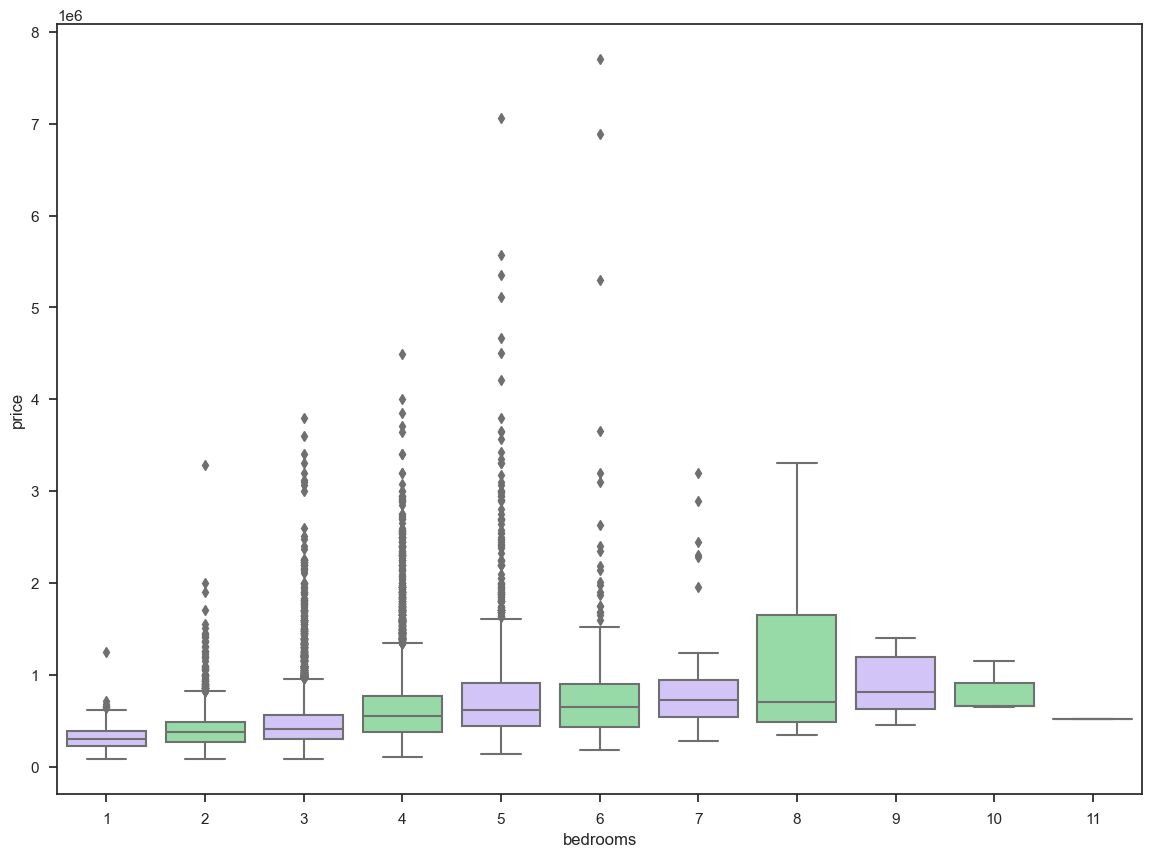

In [380]:
#plot boxplot graph for bedrooms and price
sns.set(style='ticks',palette='pastel')
fig, ax = plt.subplots(figsize=(14,10)) 
sns.boxplot(x='bedrooms',y='price',palette=["m", "g"], data=DF,ax=ax)

<Axes: xlabel='bathrooms', ylabel='price'>

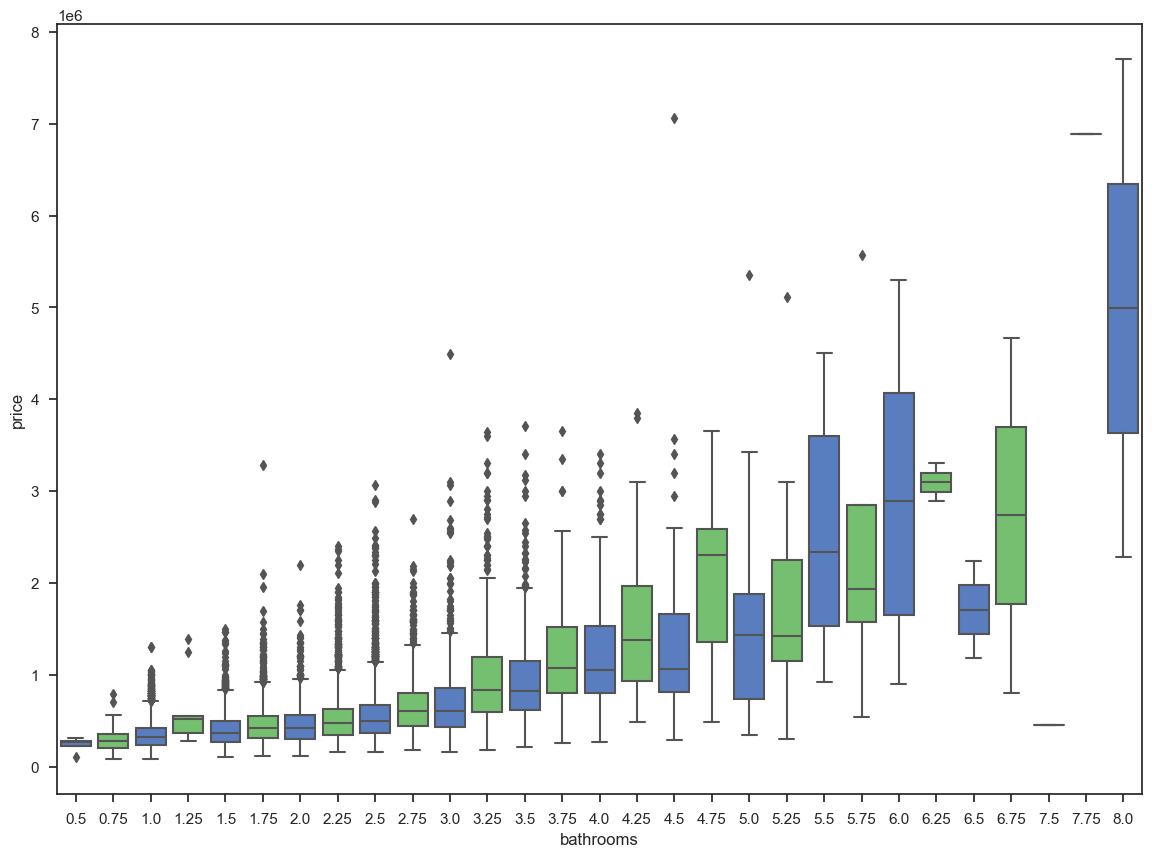

In [381]:
#boxplot between bathrooms and price
sns.set(style='ticks',palette='muted')
fig,ax=plt.subplots(figsize=(14,10))
sns.boxplot(x='bathrooms',y='price',palette=["b", "g"],data=DF,ax=ax)

In [382]:
#checking the data types
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   price          21596 non-null  float64
 2   bedrooms       21596 non-null  int64  
 3   bathrooms      21596 non-null  float64
 4   sqft_living    21596 non-null  int64  
 5   sqft_lot       21596 non-null  int64  
 6   floors         21596 non-null  float64
 7   waterfront     19220 non-null  float64
 8   view           21533 non-null  float64
 9   condition      21596 non-null  int64  
 10  grade          21596 non-null  int64  
 11  sqft_above     21596 non-null  int64  
 12  sqft_basement  21596 non-null  object 
 13  yr_built       21596 non-null  int64  
 14  yr_renovated   17754 non-null  float64
 15  zipcode        21596 non-null  int64  
 16  lat            21596 non-null  float64
 17  sqft_living15  21596 non-null  int64  
 18  sqft_lot15 

bedrooms
1     Axes(0.125,0.11;0.775x0.77)
2     Axes(0.125,0.11;0.775x0.77)
3     Axes(0.125,0.11;0.775x0.77)
4     Axes(0.125,0.11;0.775x0.77)
5     Axes(0.125,0.11;0.775x0.77)
6     Axes(0.125,0.11;0.775x0.77)
7     Axes(0.125,0.11;0.775x0.77)
8     Axes(0.125,0.11;0.775x0.77)
9     Axes(0.125,0.11;0.775x0.77)
10    Axes(0.125,0.11;0.775x0.77)
11    Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

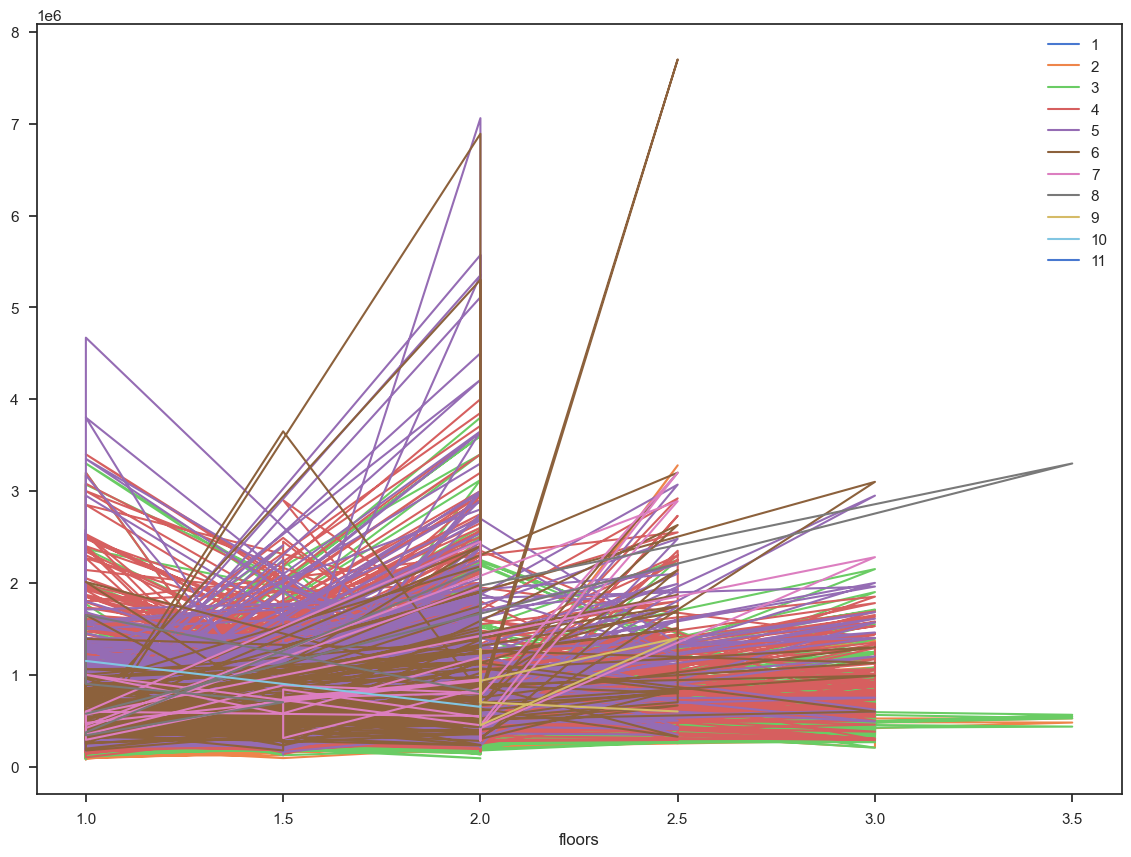

In [383]:
#graph for floors,price and bedrooms
fig,ax=plt.subplots(figsize=(14,10))
DF.set_index('floors').groupby('bedrooms')['price'].plot(legend=True)

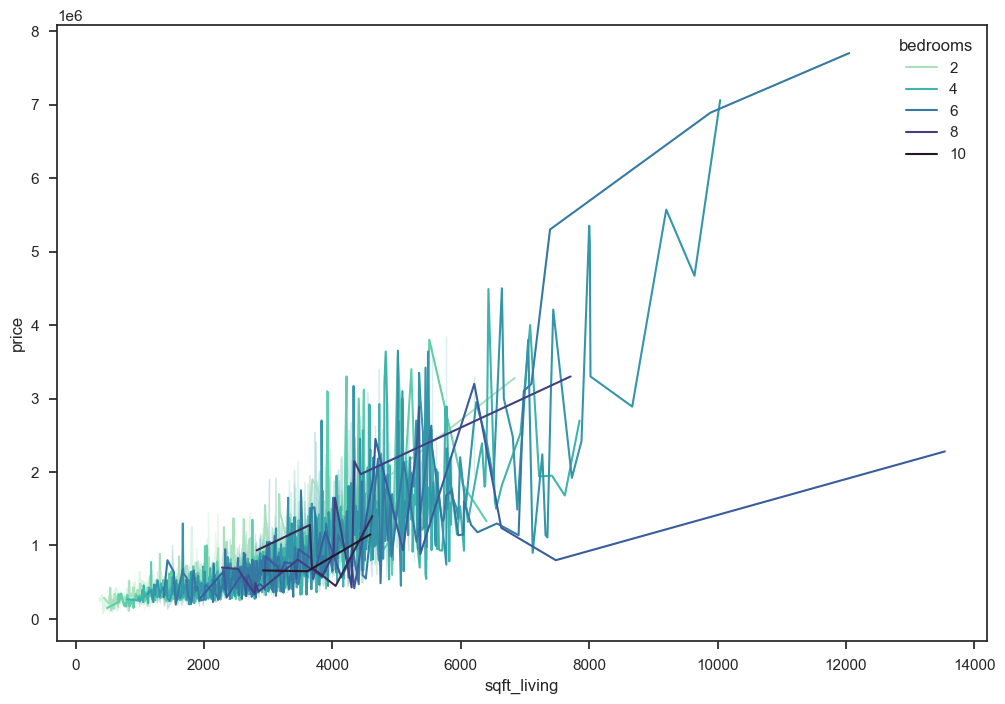

In [384]:
#lineplot for sqft living and price
fig,ax=plt.subplots(figsize=(12,8))
palette=sns.color_palette('mako_r',6)
ax=sns.lineplot(x='sqft_living',y='price',data=DF,hue='bedrooms',palette='mako_r')

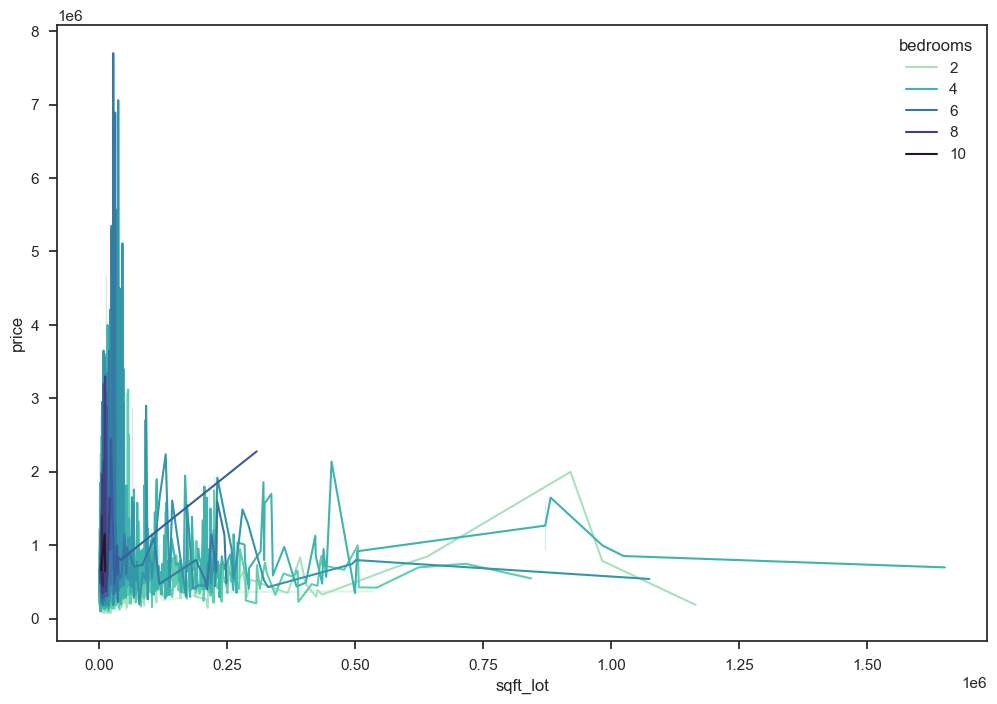

In [385]:
#lineplot for sqft lot and price
fig,ax=plt.subplots(figsize=(12,8))
palette=sns.color_palette('mako_r',6)
ax=sns.lineplot(x='sqft_lot',y='price',data=DF,hue='bedrooms',palette='mako_r')

In [386]:
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass

In [387]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        xtrans = X.T.dot(X)
        self.w = np.linalg.pinv(xtrans).dot(X.T).dot(T)
        self.w = self.w.T
        print(self.w)
        return self.w.T
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        a=self.w.dot(X.T)
        return a.T
       


In [388]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x,t in zip(X,T):
            self.train_step(x,t)
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = x.reshape(1,x.size)
        xr = self.add_ones(x)
        t = t.reshape(t.size,1)
        if self.w is None:
            self.w = np.zeros((xr.shape[1],1))
        self.w = self.w - self.alpha*(xr@self.w - t)*xr.T     ## TODO: replace this with your codes
        #else
            #self.w= self.train_step(x,t)
    
    # apply the current model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        return X1 @ self.w  

In [389]:
import matplotlib.pyplot as plt
%matplotlib inline

[[ 3.2 -2. ]]


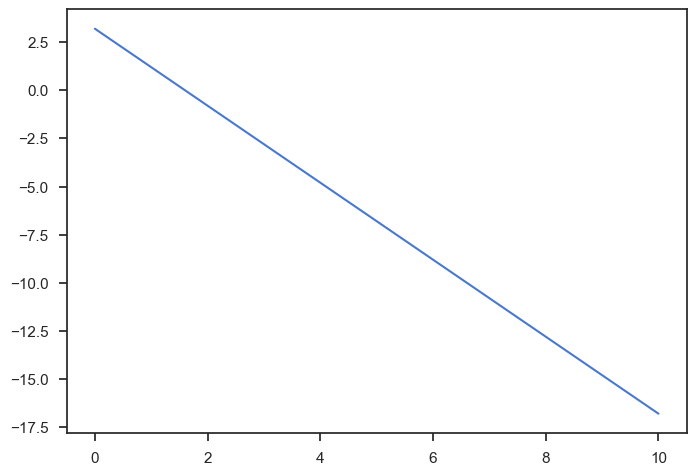

In [390]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
ls = LinearRegress()
ls.train(X, T)
plt.plot(ls.use(X))

[[ 3.2 -2. ]]


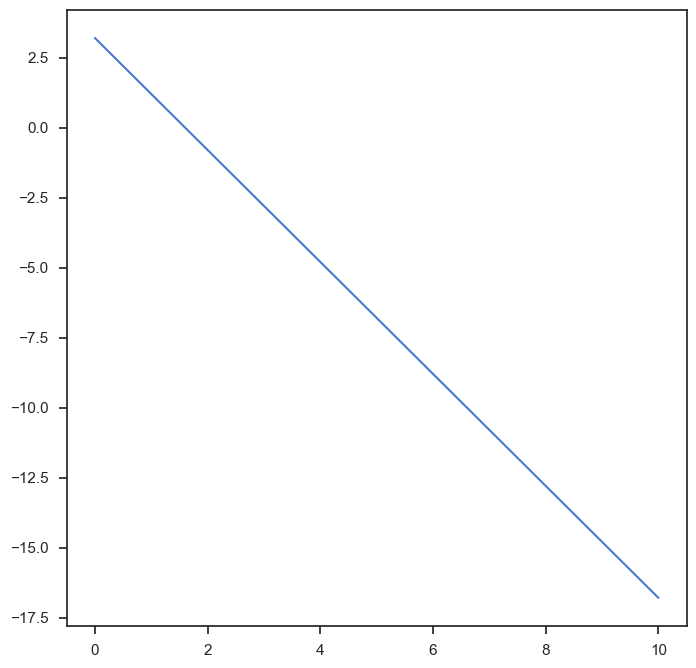

In [391]:
fig,ax=plt.subplots(figsize=(8,8))
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
ls = LinearRegress()
ls.train(X, T)
plt.plot(ls.use(X))

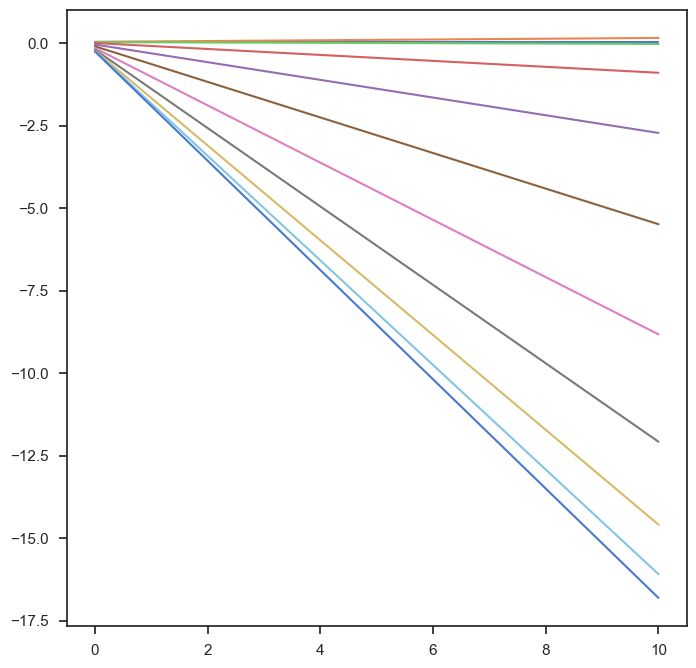

In [392]:
fig,ax=plt.subplots(figsize=(8,8))
lms = LMS(0.01)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

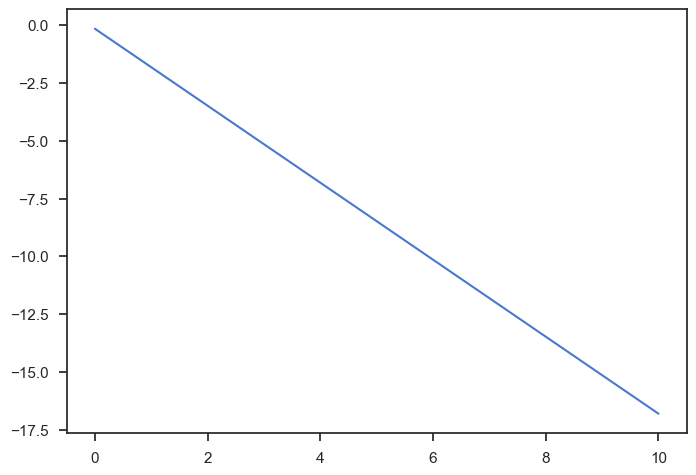

In [393]:
lms.train(X, T)
plt.plot(lms.use(X))

In [394]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
[[ 3.  3. -2.]]
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


In [395]:
#The objective of this kernel is to create a linear regression model. We performed data preprocessing and Exploratory data analysis on the dataset 'House Sales in King County, USA' to obtain the correlations between the features and find which features are useful for predicting linear regression model. We are performing least squares and least mean sqaures for the given dataset. The least squares is perfect for smaller datasets, it is not normalized where as least mean squares is perfect for large datasets, we normalize the data for reducing the skewness of the data. We plot graphs for the line and see if it fits correctly for the data or not. The preliminary tests shows that we obtained both least squares and least mean squares correctly.
